<a href="https://colab.research.google.com/github/AppleGEVision2/ML-Projects/blob/main/%20HeartDiseaseUCI_ML-DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Exploratory Data Analysis--Preprocessing and Visualization**

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/rawdata/heart_disease_uci.csv')

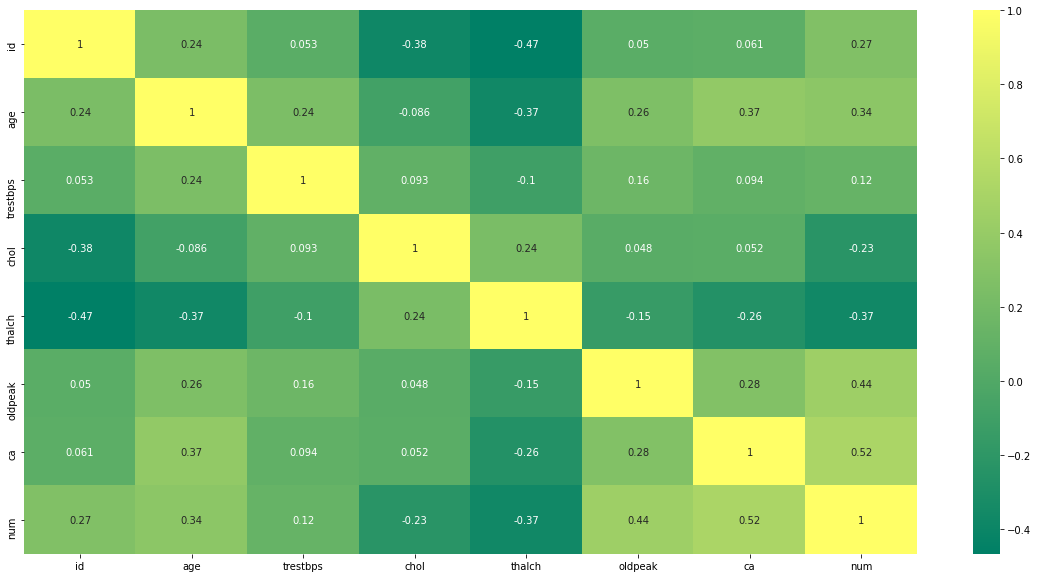

In [3]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='summer')

In [4]:
set(list(df['dataset']))

{'Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'}

In [5]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [6]:
# Checking for messing values
df.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [7]:
# clean out the messing rows
df = df.dropna()

In [8]:
# Checking for messing values again
df.isna().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [9]:
df['target'] = ((df['num'] > 0)*1).copy()

In [10]:
print(df.info())
print('\ndfShape:  {}'.format(df.shape)) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 748
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        299 non-null    int64  
 1   age       299 non-null    int64  
 2   sex       299 non-null    object 
 3   dataset   299 non-null    object 
 4   cp        299 non-null    object 
 5   trestbps  299 non-null    float64
 6   chol      299 non-null    float64
 7   fbs       299 non-null    object 
 8   restecg   299 non-null    object 
 9   thalch    299 non-null    float64
 10  exang     299 non-null    object 
 11  oldpeak   299 non-null    float64
 12  slope     299 non-null    object 
 13  ca        299 non-null    float64
 14  thal      299 non-null    object 
 15  num       299 non-null    int64  
 16  target    299 non-null    int64  
dtypes: float64(5), int64(4), object(8)
memory usage: 42.0+ KB
None

dfShape:  (299, 17)


In [11]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,target
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,0


In [12]:
# search duplicate items
df.duplicated().sum()

0

In [13]:
# summarize the categorical values
df.describe(include=['O'])
from itertools import islice
  
# Input list initialization
categorical_val_index = list(df.describe(include=['O']).columns)
  
# list of length in which we have to split
length_to_split = [3, 3, 2]
  
# Using islice
categorical_val = iter(categorical_val_index)
categorical_val_splited = [list(islice(categorical_val, elem))
          for elem in length_to_split]

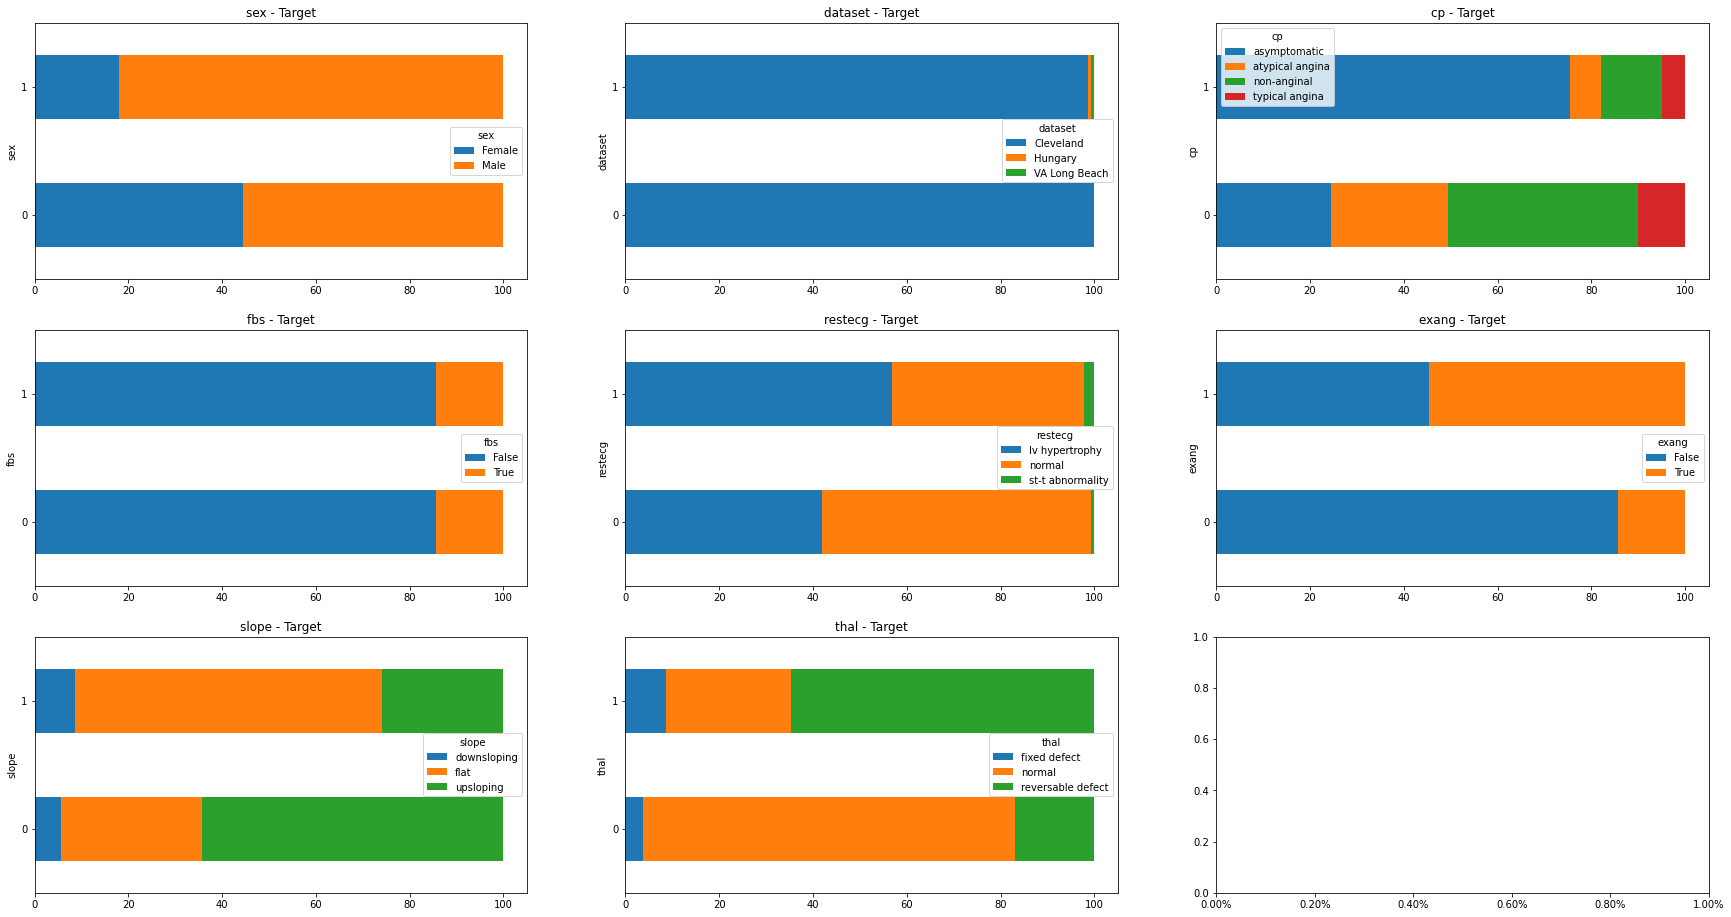

In [14]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
fig, axes = plt.subplots(len(categorical_val_splited), len(categorical_val_splited[0]), figsize=(30, 16))
for i in range(len(categorical_val_splited)):
    for j in range(len(categorical_val_splited[i])):
      df.groupby(['target', categorical_val_splited[i][j]]).size().groupby(level=0).apply(
          lambda x: 100 * x / x.sum()
      ).unstack().plot(kind='barh',stacked=True,xlabel = categorical_val_splited[i][j] ,ylabel = "Distribution Percentage", ax = axes[i][j])
      axes [i][j].set_title(categorical_val_splited[i][j]  + " - Target")
 
 
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()   

 

In [15]:
# summarize the numerical values
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num,target
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,153.872910,54.521739,131.715719,246.785953,149.327759,1.058528,0.672241,0.946488,0.464883
std,95.896287,9.030264,17.747751,52.532582,23.121062,1.162769,0.937438,1.230409,0.499601
min,1.000000,29.000000,94.000000,100.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,75.500000,48.000000,120.000000,211.000000,132.500000,0.000000,0.000000,0.000000,0.000000
50%,151.000000,56.000000,130.000000,242.000000,152.000000,0.800000,0.000000,0.000000,0.000000
75%,227.500000,61.000000,140.000000,275.500000,165.500000,1.600000,1.000000,2.000000,1.000000
max,749.000000,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000,4.000000,1.000000


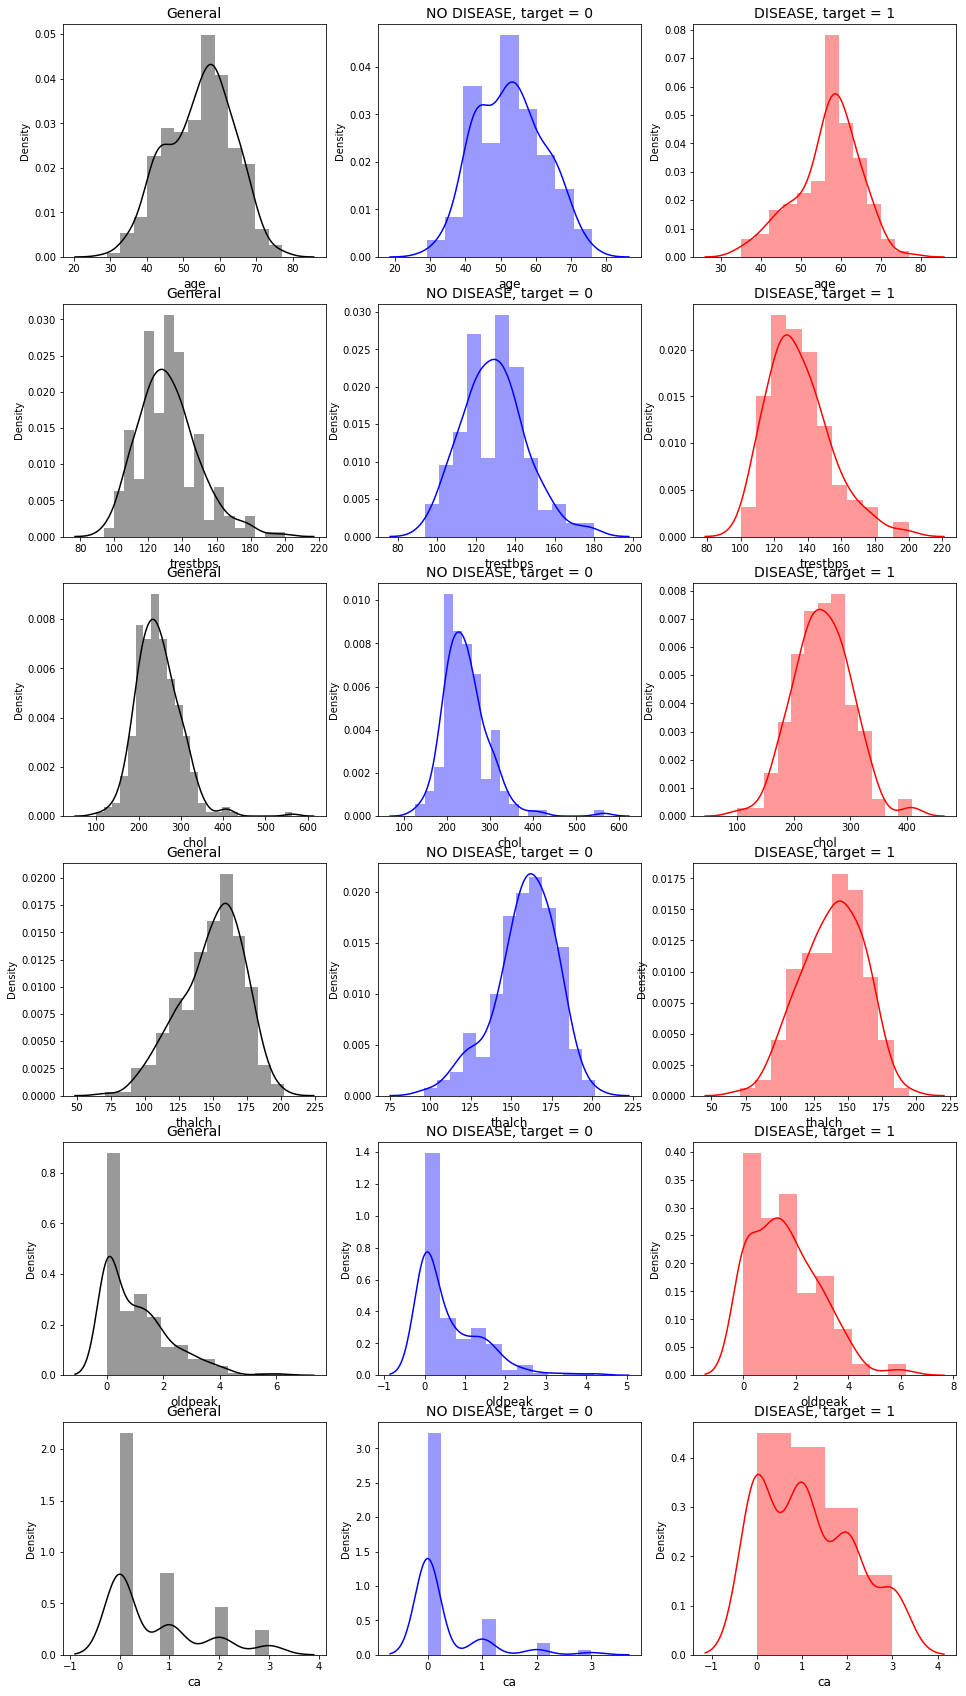

In [16]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
no_disease_rows = df[(df['target'] ==0)]
disease_rows    = df[(df['target'] ==1)]

 
subNumOfRow = len(df.describe().columns[1:7]) 
subNumOfCol = 3    
inital_subPlotNum  = 1     

fig = plt.figure(figsize=(16,30))
for i in df.describe().columns[1:7]:
    fig.add_subplot(subNumOfRow, subNumOfCol, inital_subPlotNum)
    plt.title('General', fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.distplot(df[i],color='Black')
    inital_subPlotNum += 1
    fig.add_subplot(subNumOfRow, subNumOfCol, inital_subPlotNum)
    plt.title('NO DISEASE, target = 0', fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.distplot(no_disease_rows[i],color='Blue')
    inital_subPlotNum  += 1
    fig.add_subplot(subNumOfRow, subNumOfCol, inital_subPlotNum)
    plt.title('DISEASE, target = 1', fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.distplot(disease_rows[i],color='Red')
    inital_subPlotNum += 1

plt.show()

In [17]:
df_NUM = df[[x for x in df.describe().drop(['id','num','target'],axis = 1).columns]]
df_CAT = df[[x for x in df.describe(include = 'O').drop(['dataset'],axis = 1).columns]]
#one-hot encoding on type 'Object'
df_CAT_OHE = pd.get_dummies(df_CAT,dtype=float)   

In [18]:
#The indices of original Category data column , it consisting 8 columns after dropped the redundant columns from the raw dataset
df.select_dtypes(include=['O']).columns

Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [19]:
#The indices of One-hot encoded Category data column, it consisting 19 columns with all of unique encoded representations from the original category columns 
df_CAT_OHE.columns

Index(['sex_Female', 'sex_Male', 'cp_asymptomatic', 'cp_atypical angina',
       'cp_non-anginal', 'cp_typical angina', 'fbs_False', 'fbs_True',
       'restecg_lv hypertrophy', 'restecg_normal', 'restecg_st-t abnormality',
       'exang_False', 'exang_True', 'slope_downsloping', 'slope_flat',
       'slope_upsloping', 'thal_fixed defect', 'thal_normal',
       'thal_reversable defect'],
      dtype='object')

In [20]:
#return shape of the One-hot encoded Category data column
df_CAT_OHE.shape

(299, 19)

In [21]:
#return head of original Category data column 
df_CAT_OHE.head()

,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_False,fbs_True,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


age


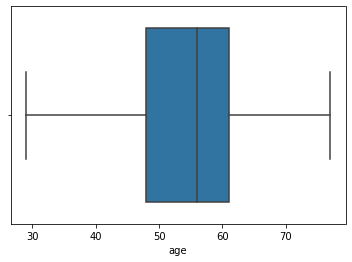

trestbps


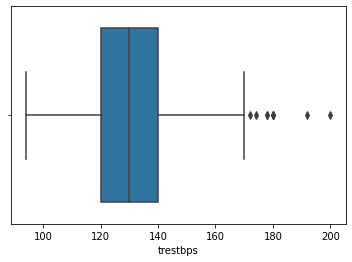

chol


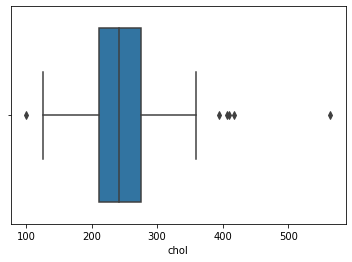

thalch


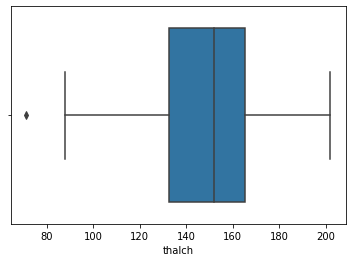

oldpeak


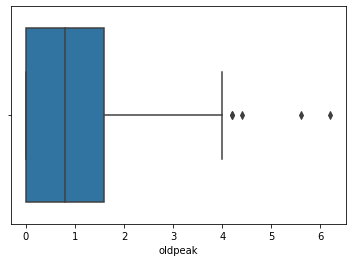

ca


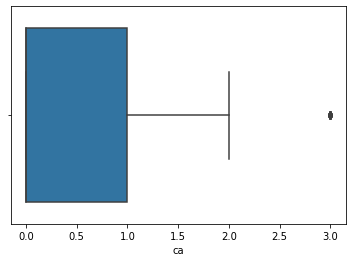

In [22]:
for i in df_NUM.columns:
    sns.boxplot(df[i],data=df)
    print(i)
    plt.show()

In [23]:
# Normalize Numerical Data columns, rescaling data from the original range with a certain range, typically between 1 and 0, it remains the sensitivity to the outliers due to the distribution of each numerical value in the dataset showing above.
from sklearn.preprocessing import MinMaxScaler
df_NUM_NORM = pd.DataFrame(data = MinMaxScaler().fit_transform(df_NUM), columns = df_NUM.columns)

In [24]:
#return shape of the Normalize Numerical Data columns
df_NUM_NORM.shape

(299, 6)

In [25]:
#return head of Normalize Numerical Data columns
df_NUM_NORM.head()

,age,trestbps,chol,thalch,oldpeak,ca
0,0.708333,0.481132,0.286638,0.603053,0.370968,0.000000
1,0.791667,0.622642,0.400862,0.282443,0.241935,1.000000
2,0.791667,0.245283,0.278017,0.442748,0.419355,0.666667
3,0.166667,0.339623,0.323276,0.885496,0.564516,0.000000
4,0.250000,0.339623,0.224138,0.770992,0.225806,0.000000


In [26]:
#combine CAT and NUM columns to be the new encoded dataframe 
df_NEW_Encoded = df_CAT_OHE.join(df_NUM_NORM).copy()  #  add numeric columns
df_NEW_Encoded['target'] = df['target']

In [27]:
#return shape of the new encoded dataframe 
df_NEW_Encoded.shape

(299, 26)

In [28]:
#return head of the new encoded dataframe 
df_NEW_Encoded.head()

,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_False,fbs_True,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect,age,trestbps,chol,thalch,oldpeak,ca,target
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.708333,0.481132,0.286638,0.603053,0.370968,0.000000,0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.791667,0.622642,0.400862,0.282443,0.241935,1.000000,1
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.791667,0.245283,0.278017,0.442748,0.419355,0.666667,1
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.166667,0.339623,0.323276,0.885496,0.564516,0.000000,0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.250000,0.339623,0.224138,0.770992,0.225806,0.000000,0


##**Exploratory Date Analysis--Visualizaion**

In [29]:
# check the imbalance situation of dataset
df_0 = df_NEW_Encoded[df_NEW_Encoded['target'] == 0.0]
df_1 = df_NEW_Encoded[df_NEW_Encoded['target'] == 1.0]
len(df_0)/len(df_1)

1.1510791366906474

In [318]:
# Ratio num of two genders
df_Male = df_NEW_Encoded[df_NEW_Encoded['sex_Female'] == 0.0]
df_Female = df_NEW_Encoded[df_NEW_Encoded['sex_Female'] == 1.0]
len(df_Male)/len(df_Female)

2.094736842105263

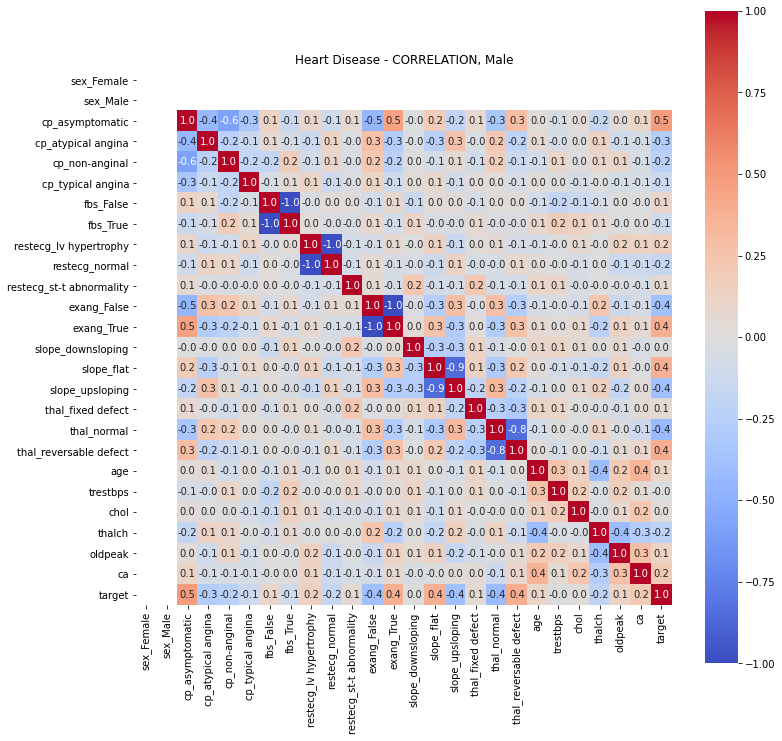

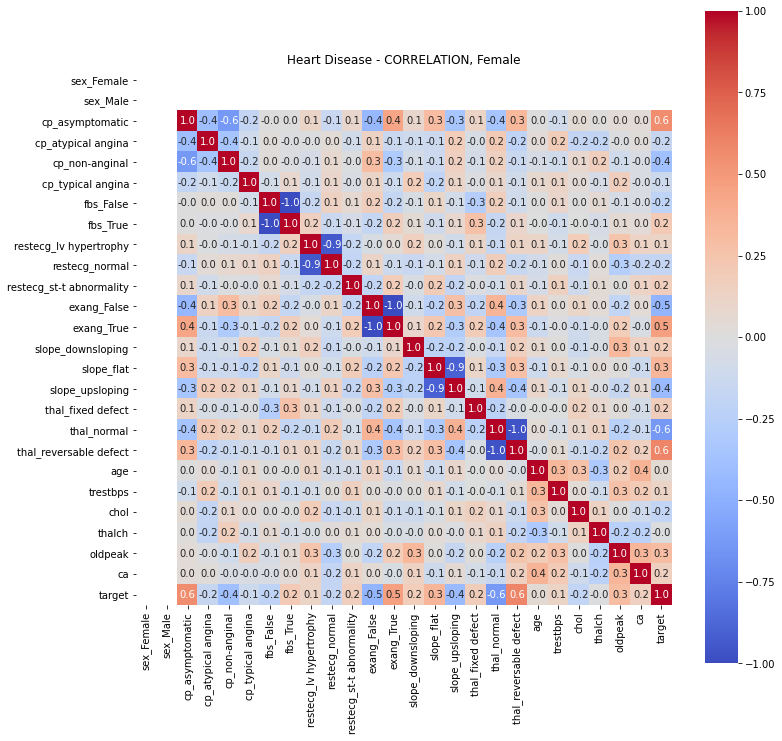

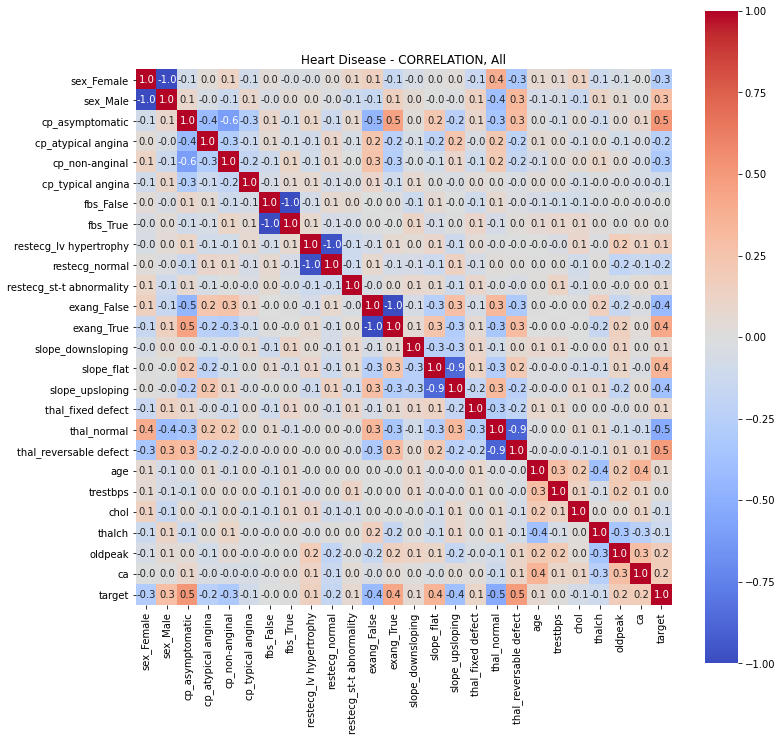

In [31]:
#Obsearvation 1: Human-Male Heart-disease Corr-Diagram and Corr variable ranking table 
dataCorr_Male = df_Male.corr()
dataCorr_Female = df_Female.corr()
datacorr = df_NEW_Encoded.corr()
plt.figure(figsize=(12,12))
plt.title('Heart Disease - CORRELATION, Male', fontsize=12)
sns.heatmap(dataCorr_Male, annot=True, fmt='.1f', square=True, cmap = 'coolwarm')
plt.figure(figsize=(12,12))
plt.title('Heart Disease - CORRELATION, Female', fontsize=12)
sns.heatmap(dataCorr_Female, annot=True, fmt='.1f', square=True, cmap = 'coolwarm')
plt.figure(figsize=(12,12))
plt.title('Heart Disease - CORRELATION, All', fontsize=12)
sns.heatmap(datacorr, annot=True, fmt='.1f', square=True, cmap = 'coolwarm')


In [32]:
corr_Male = dataCorr_Male['target'].sort_values(ascending=False)
corr_Male = corr_Male.drop(['target'])
corr_md = corr_Male.to_dict()
#Obsearvation 2: Human-Female Heart-disease Corr Diagram and Corr variable ranking table
corr_Female = dataCorr_Female['target'].sort_values(ascending=False)
corr_Female = corr_Female.drop(['target'])
corr_fmd = corr_Female.to_dict()

In [33]:
#print the table to rank all the corr of the two observations
print(corr_Female.to_frame())
print(corr_Male.to_frame())

                            target
thal_reversable defect    0.594466
cp_asymptomatic           0.557676
exang_True                0.467083
slope_flat                0.346327
oldpeak                   0.302696
fbs_True                  0.206338
slope_downsloping         0.181377
thal_fixed defect         0.172901
restecg_st-t abnormality  0.166259
ca                        0.161403
trestbps                  0.124353
restecg_lv hypertrophy    0.121077
age                       0.047084
thalch                   -0.011564
cp_typical angina        -0.123731
cp_atypical angina       -0.163432
restecg_normal           -0.178550
chol                     -0.183085
fbs_False                -0.206338
cp_non-anginal           -0.389796
slope_upsloping          -0.426623
exang_False              -0.467083
thal_normal              -0.626279
sex_Female                     NaN
sex_Male                       NaN
                            target
cp_asymptomatic           0.488517
thal_reversable defe

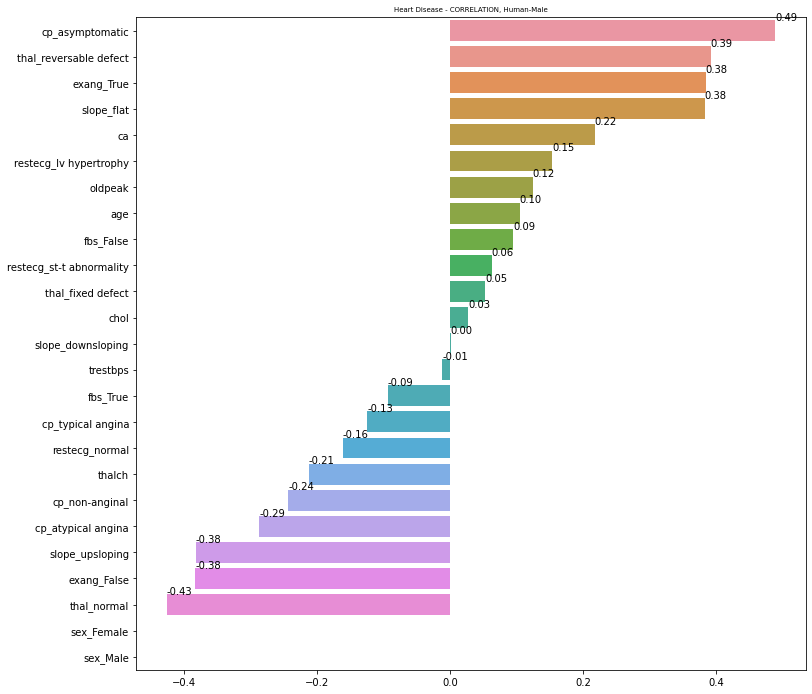

In [34]:
plt.figure(figsize=(12,12))
plt.title('Heart Disease - CORRELATION, Human-Male', fontsize=7)
ax = sns.barplot(y=corr_Male.index,x=corr_Male.values, orient = 'h')
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()))   
plt.show()

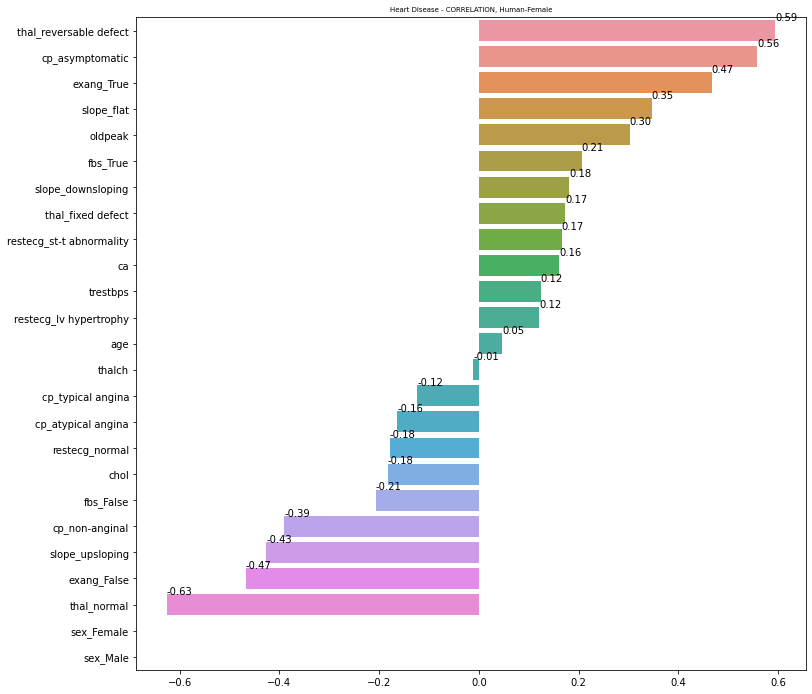

In [35]:
plt.figure(figsize=(12,12))
plt.title('Heart Disease - CORRELATION, Human-Female', fontsize=7)
ax = sns.barplot(y=corr_Female.index,x=corr_Female.values, orient = 'h')
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()))   
plt.show()

In [36]:
# compare corr values between the corr values of two genders 
mdv = []
fmdv = []
for key,value in corr_md.items():
  mdv.append(value)
  fmdv.append(corr_fmd[key])

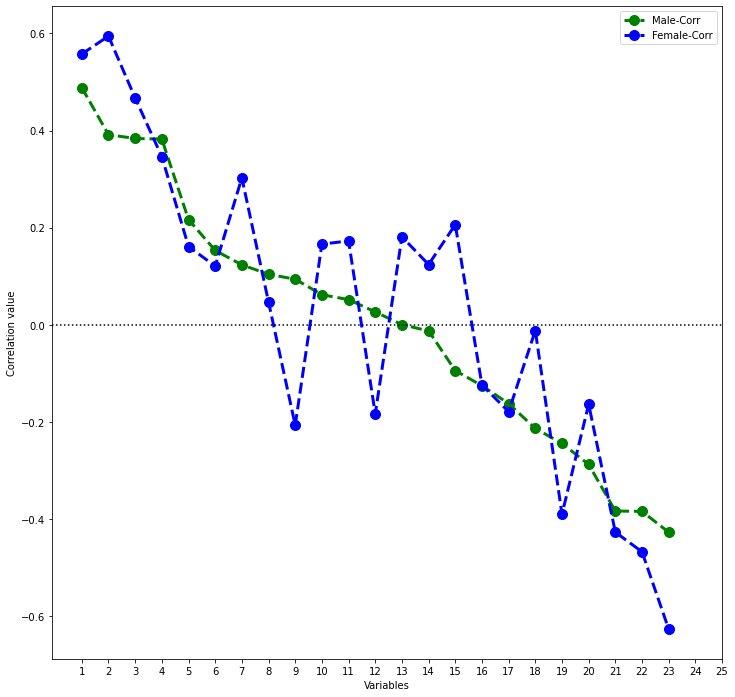

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))  
 
group1 = mdv
group2 = fmdv
x = np.linspace(1, len(corr_md), len(corr_md))
# Create a dotted line here
plt.plot(x, group1, color = "g", marker = "o", linestyle= "--", linewidth = 3,
        markersize = 10)
plt.plot(x, group2, color = "b", marker = "o", linestyle= "--", linewidth = 3,
        markersize = 10)
plt.legend(["Male-Corr", "Female-Corr"])
plt.axhline(y=0, color="black", linestyle=":")
plt.ylabel("Correlation value")
plt.xlabel("Variables")
plt.xticks(x)
plt.show()

In [38]:
## Observations ##
pos_corr_both,pos_corr_male_only,pos_corr_female_only,neg_corr_both  = [],[],[],[]
# Positive-corr value for both genders : 1-8 
for index, key in enumerate(corr_md):
  if  (index in [int(x) for x in range(8)]): pos_corr_both.append(key)
  elif  index == 10 or index == 11 : pos_corr_both.append(key)
  else : pass
# Positive value for Male, Neg value for Female : 9,12
for index, key in enumerate(corr_md):
  if (index == 9 or index == 12): pos_corr_male_only.append(key)
     
# Positive value for Female, Neg or zero value for Male : 13, 14,15
for index, key in enumerate(corr_md):
  if index == 15 or index == 13 or index == 14: pos_corr_female_only.append(key)
# neg-corr value for both genders : 16-23
for index, key in enumerate(corr_md):
  if index >= 16: neg_corr_both.append(key)

In [39]:
print(pos_corr_both)

['cp_asymptomatic', 'thal_reversable defect', 'exang_True', 'slope_flat', 'ca', 'restecg_lv hypertrophy', 'oldpeak', 'age', 'thal_fixed defect', 'chol']


In [40]:
#Obsearvation 3: Human-Species Heart-disease Corr Diagram and Corr variable ranking table
corr = datacorr['target'].sort_values(ascending=False)
corr = corr.drop(['target'])
corr_table = corr.to_frame()
pos_corr_all = corr_table[corr_table['target'] > 0]

In [41]:
print(list(pos_corr_all.index))

['cp_asymptomatic', 'thal_reversable defect', 'exang_True', 'slope_flat', 'sex_Male', 'ca', 'oldpeak', 'restecg_lv hypertrophy', 'thal_fixed defect', 'restecg_st-t abnormality', 'age', 'slope_downsloping', 'trestbps', 'fbs_True']


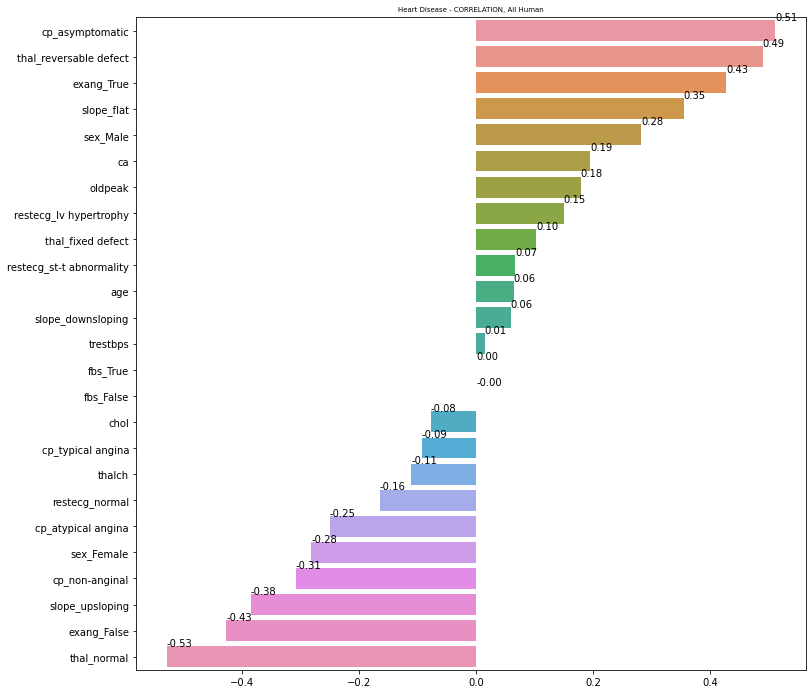

In [42]:
plt.figure(figsize=(12,12))
plt.title('Heart Disease - CORRELATION, All Human', fontsize=7)
ax = sns.barplot(y=corr.index,x=corr.values, orient = 'h')
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()))   
plt.show()

In [43]:
df_NUM.columns

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca'], dtype='object')

<function matplotlib.pyplot.show>

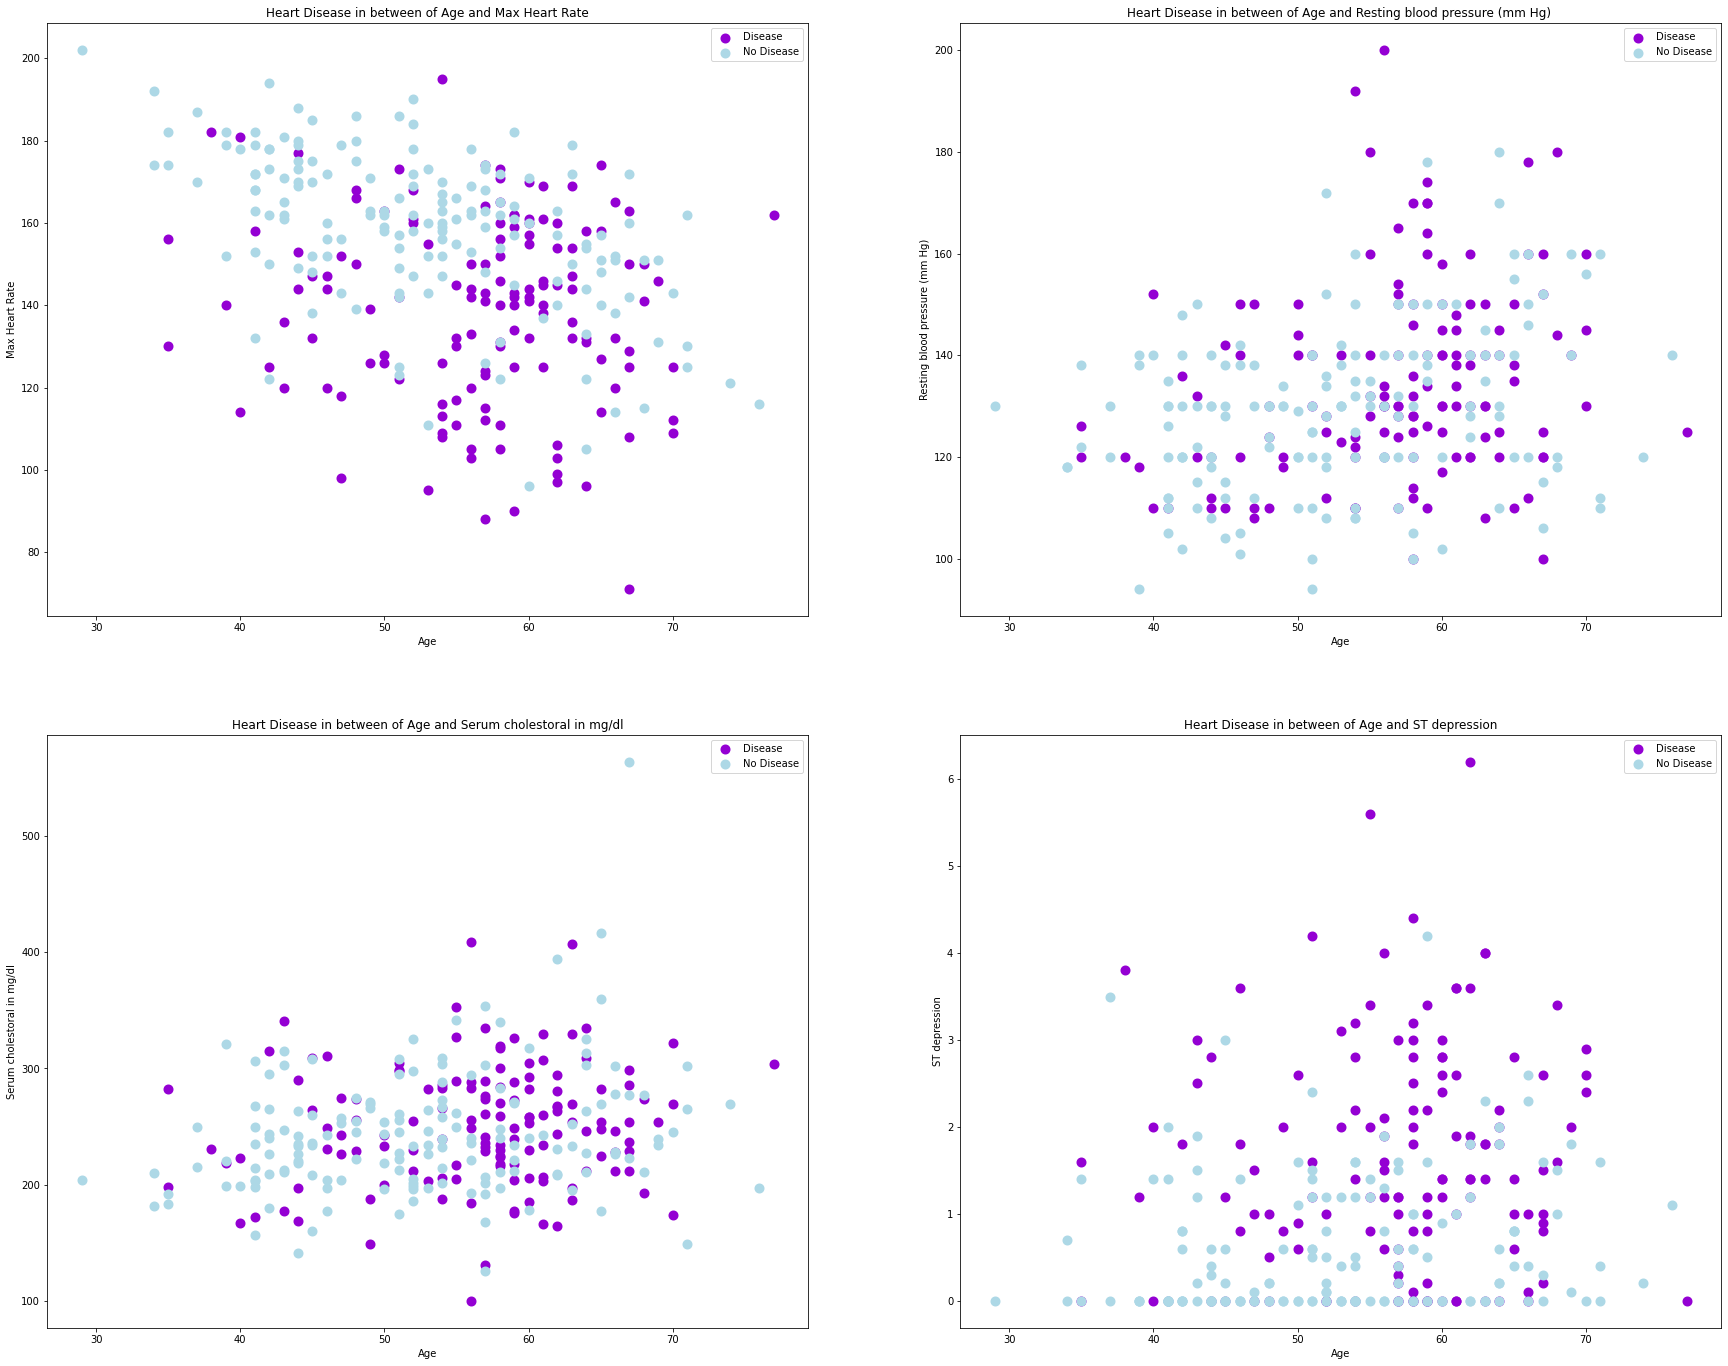

In [44]:
fig, [(axes1,axes2),(axes3,axes4)] = plt.subplots(2, 2, figsize=(30, 24))
# Scatter with postivie examples
axes1.scatter(df.age[df.target==1],
            df.thalch[df.target==1],
            c="darkviolet",linewidths = 4)
# Scatter with negative examples
axes1.scatter(df.age[df.target==0],
            df.thalch[df.target==0],
            c="lightblue",linewidths = 4)
axes1.set_title("Heart Disease in between of Age and Max Heart Rate")
axes1.set_xlabel("Age")
axes1.set_ylabel("Max Heart Rate")
axes1.legend(["Disease", "No Disease"], loc = 'upper right')

# age vs Resting blood pressure
axes2.scatter(df.age[df.target==1],
            df.trestbps[df.target==1],
            c="darkviolet",linewidths = 4)
axes2.scatter(df.age[df.target==0],
            df.trestbps[df.target==0],
            c="lightblue",linewidths = 4)
axes2.set_title("Heart Disease in between of Age and Resting blood pressure (mm Hg) ")
axes2.set_xlabel("Age")
axes2.set_ylabel("Resting blood pressure (mm Hg)")
axes2.legend(["Disease", "No Disease"], loc = 'upper right')

# age vs Serum cholestoral
axes3.scatter(df.age[df.target==1],
            df.chol[df.target==1],
            c="darkviolet",linewidths = 4)
axes3.scatter(df.age[df.target==0],
            df.chol[df.target==0],
            c="lightblue",linewidths = 4)
axes3.set_title("Heart Disease in between of Age and Serum cholestoral in mg/dl")
axes3.set_xlabel("Age")
axes3.set_ylabel("Serum cholestoral in mg/dl")
axes3.legend(["Disease", "No Disease"], loc = 'upper right')

# Age vs ST depression
axes4.scatter(df.age[df.target==1],
            df.oldpeak[df.target==1],
            c="darkviolet",linewidths = 4)
# Scatter with negative examples
axes4.scatter(df.age[df.target==0],
            df.oldpeak[df.target==0],
            c="lightblue",linewidths = 4)
# Add some helpful info
axes4.set_title("Heart Disease in between of Age and ST depression")
axes4.set_xlabel("Age")
axes4.set_ylabel("ST depression")
axes4.legend(["Disease", "No Disease"], loc = 'upper right')
plt.show

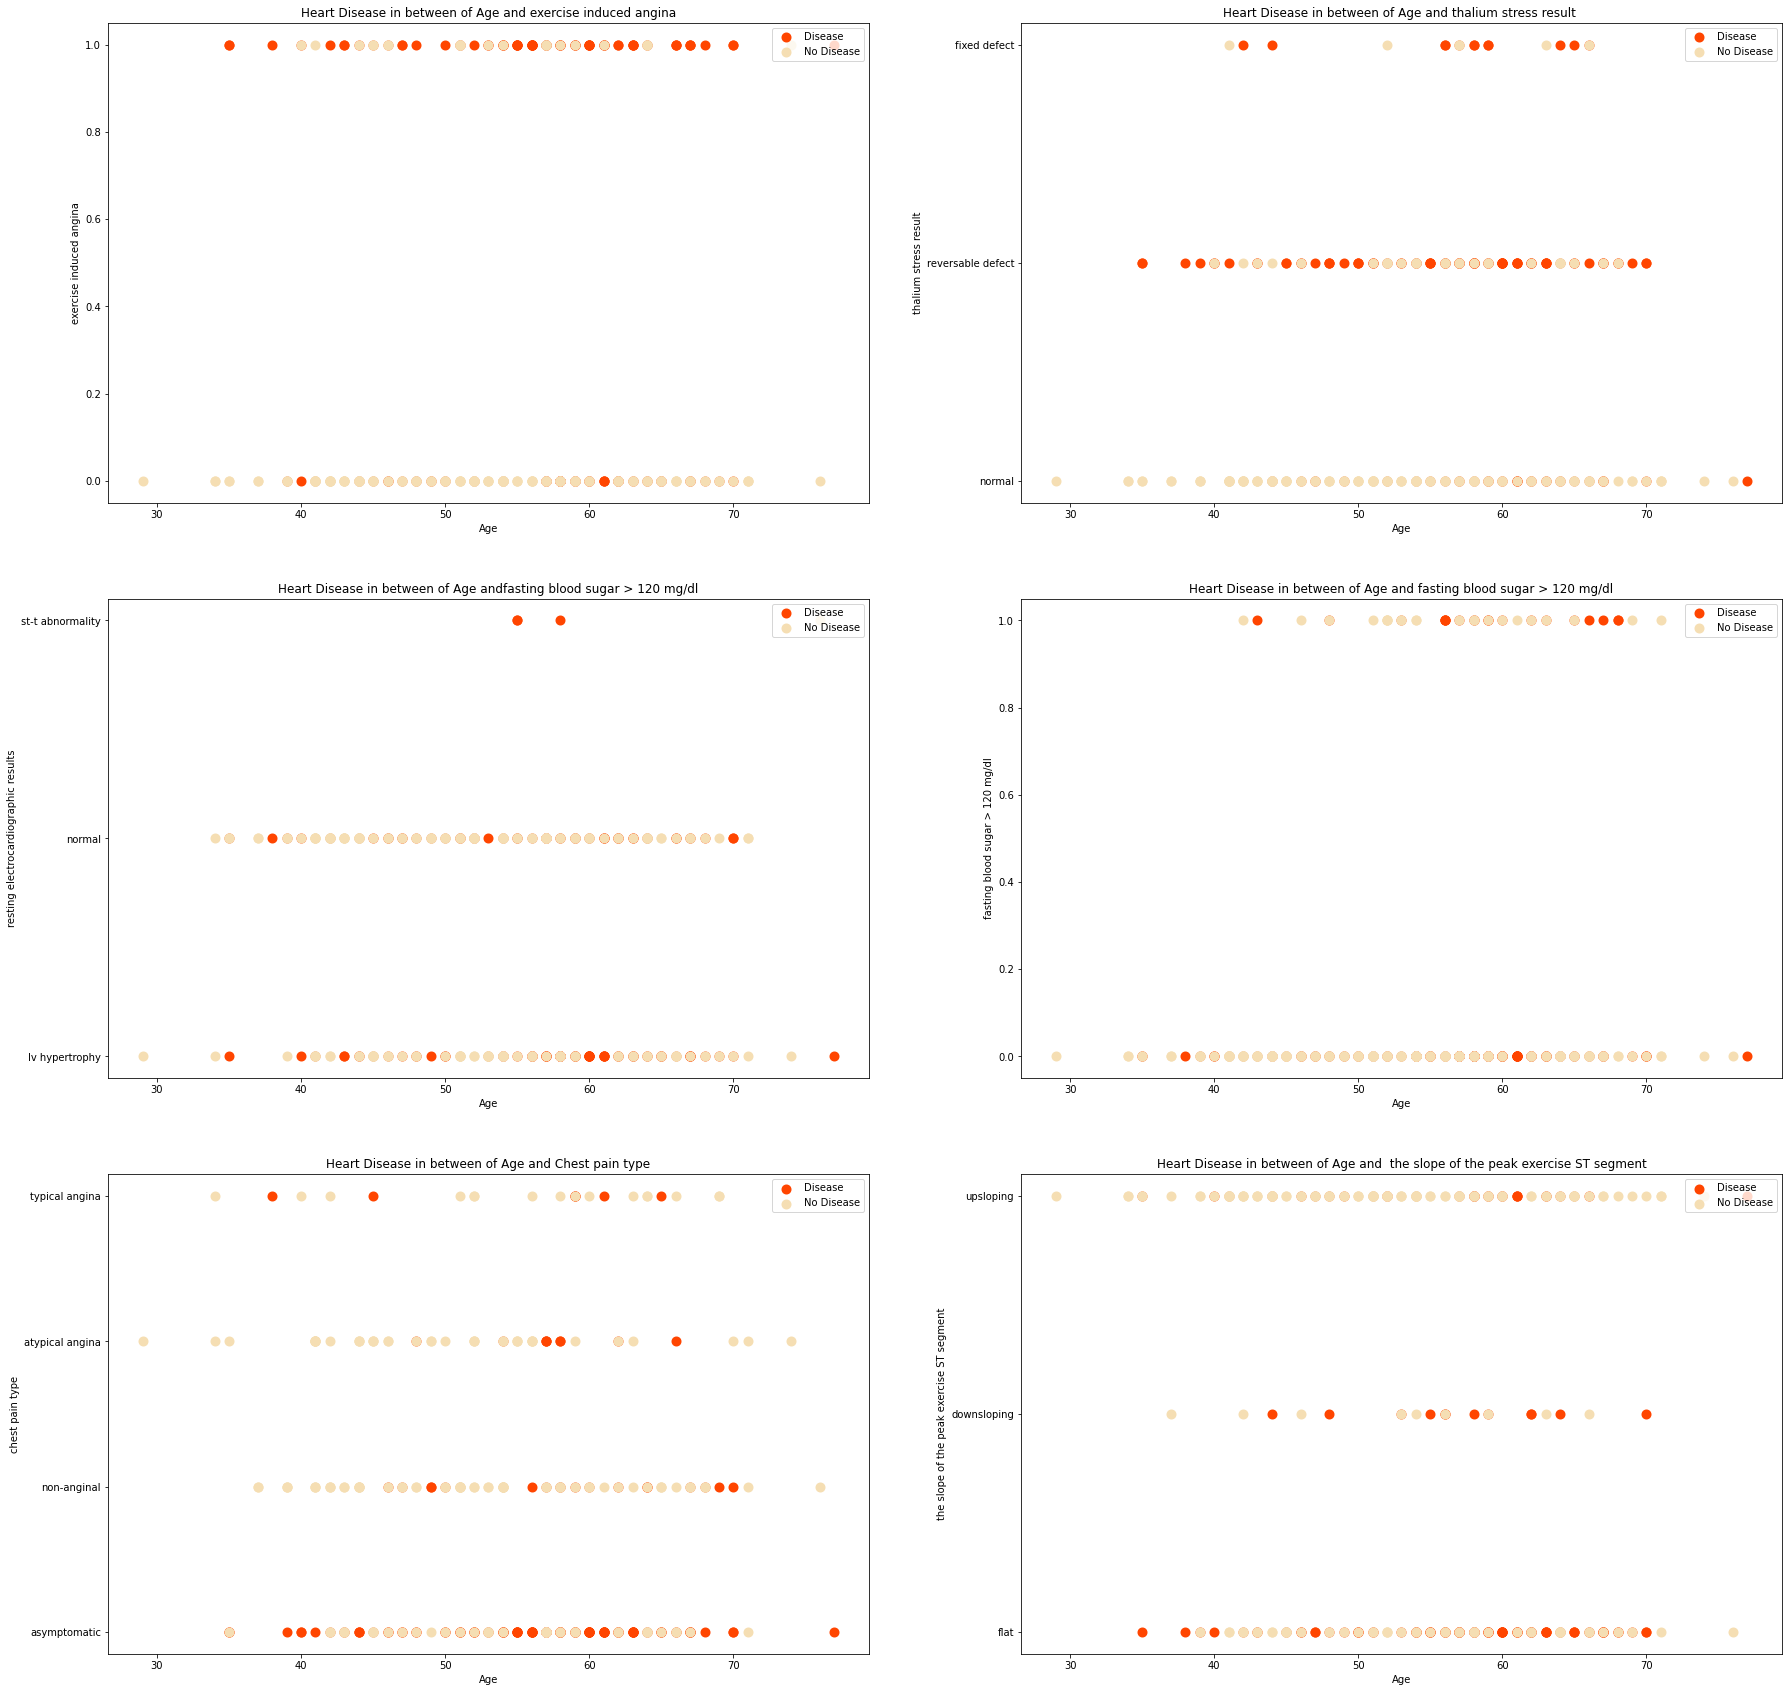

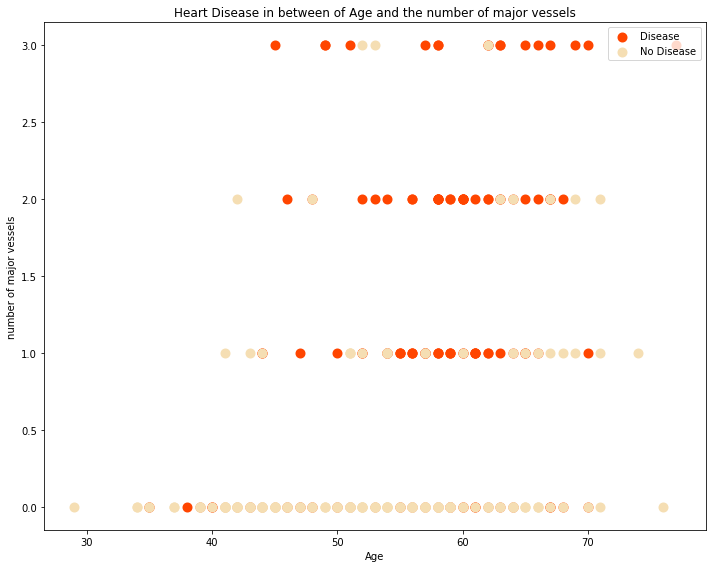

In [45]:
fig, [(axes0,axes5),(axes7,axes9),(axes11,axes13)] = plt.subplots(3, 2, figsize=(30, 30))
# Scatter with postivie examples
axes0.scatter(df.age[df.target==1],
            df.exang[df.target==1],
            c="orangered",linewidths = 4)
# Scatter with negative examples
axes0.scatter(df.age[df.target==0],
            df.exang[df.target==0],
            c="wheat",linewidths = 4)
axes0.set_title("Heart Disease in between of Age and exercise induced angina")
axes0.set_xlabel("Age")
axes0.set_ylabel("exercise induced angina")
axes0.legend(["Disease", "No Disease"], loc = 'upper right')

# age vs thalium stress result
axes5.scatter(df.age[df.target==1],
            df.thal[df.target==1],
            c="orangered",linewidths = 4)
axes5.scatter(df.age[df.target==0],
            df.thal[df.target==0],
            c="wheat",linewidths = 4)
axes5.set_title("Heart Disease in between of Age and thalium stress result ")
axes5.set_xlabel("Age")
axes5.set_ylabel("thalium stress result")
axes5.legend(["Disease", "No Disease"], loc = 'upper right')

# age vs fasting blood sugar > 120 mg/dl
axes7.scatter(df.age[df.target==1],
            df.restecg[df.target==1],
            c="orangered",linewidths = 4)
axes7.scatter(df.age[df.target==0],
            df.restecg[df.target==0],
            c="wheat",linewidths = 4)
axes7.set_title("Heart Disease in between of Age andfasting blood sugar > 120 mg/dl")
axes7.set_xlabel("Age")
axes7.set_ylabel("resting electrocardiographic results")
axes7.legend(["Disease", "No Disease"], loc = 'upper right')

# Age vs fasting blood sugar > 120 mg/dl
axes9.scatter(df.age[df.target==1],
            df.fbs[df.target==1],
            c="orangered",linewidths = 4)
# Scatter with negative examples
axes9.scatter(df.age[df.target==0],
            df.fbs[df.target==0],
            c="wheat",linewidths = 4)
# Add some helpful info
axes9.set_title("Heart Disease in between of Age and fasting blood sugar > 120 mg/dl")
axes9.set_xlabel("Age")
axes9.set_ylabel("fasting blood sugar > 120 mg/dl")
axes9.legend(["Disease", "No Disease"], loc = 'upper right')

# age vs chest pain type
axes11.scatter(df.age[df.target==1],
            df.cp[df.target==1],
            c="orangered",linewidths = 4)
axes11.scatter(df.age[df.target==0],
            df.cp[df.target==0],
            c="wheat",linewidths = 4)
axes11.set_title("Heart Disease in between of Age and Chest pain type")
axes11.set_xlabel("Age")
axes11.set_ylabel("chest pain type")
axes11.legend(["Disease", "No Disease"], loc = 'upper right')

# Age vs  the slope of the peak exercise ST segment
axes13.scatter(df.age[df.target==1],
            df.slope[df.target==1],
            c="orangered",linewidths = 4)
# Scatter with negative examples
axes13.scatter(df.age[df.target==0],
            df.slope[df.target==0],
            c="wheat",linewidths = 4)
# Add some helpful info
axes13.set_title("Heart Disease in between of Age and  the slope of the peak exercise ST segment")
axes13.set_xlabel("Age")
axes13.set_ylabel("the slope of the peak exercise ST segment")
axes13.legend(["Disease", "No Disease"], loc = 'upper right')


fig, axes15 = plt.subplots(1, 1, figsize=(10, 8))
# Age vs  number of major vessels
axes15.scatter(df.age[df.target==1],
            df.ca[df.target==1],
            c="orangered",linewidths = 4)
# Scatter with negative examples
axes15.scatter(df.age[df.target==0],
            df.ca[df.target==0],
            c="wheat",linewidths = 4)
# Add some helpful info
axes15.set_title("Heart Disease in between of Age and the number of major vessels")
axes15.set_xlabel("Age")
axes15.set_ylabel("number of major vessels")
axes15.legend(["Disease", "No Disease"], loc = 'upper right')
plt.tight_layout()
plt.show()

## **Classification**

###**Tradition ML classification**

In [470]:
from sklearn.model_selection import train_test_split
df_NEW_Encoded = df_NEW_Encoded.dropna()
X = df_NEW_Encoded.drop('target', axis=1).copy()
y = df_NEW_Encoded.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

In [47]:
len(X.values[0])

25

In [ ]:
!pip install scikit-learn --upgrade 

In [ ]:
!pip install delayed

logisticClf  Train_Accuracy: 80.58974358974359%  Test_Accuracy: 79.63157894736842%  Roc_Auc_score:  0.8143939393939394  
PassiveAggressiveClf  Train_Accuracy: 69.3974358974359%  Test_Accuracy: 71.57894736842105%  Roc_Auc_score:  0.617003367003367  
PerceptronClf  Train_Accuracy: 70.89743589743588%  Test_Accuracy: 72.42105263157896%  Roc_Auc_score:  0.757996632996633  
SGDClf  Train_Accuracy: 70.94871794871794%  Test_Accuracy: 65.15789473684211%  Roc_Auc_score:  0.7861952861952862  
MLP-Clf  Train_Accuracy: 72.5%  Test_Accuracy: 58.263157894736835%  Roc_Auc_score:  0.6893939393939393  
KNN-1Clf  Train_Accuracy: 72.44871794871794%  Test_Accuracy: 77.57894736842104%  Roc_Auc_score:  0.7916666666666667  
KNN-2Clf  Train_Accuracy: 73.99999999999999%  Test_Accuracy: 77.42105263157895%  Roc_Auc_score:  0.7512626262626263  
KNN-5Clf  Train_Accuracy: 78.05128205128206%  Test_Accuracy: 77.47368421052633%  Roc_Auc_score:  0.7710437710437711  
KNN-10Clf  Train_Accuracy: 78.53846153846153%  Test_Ac

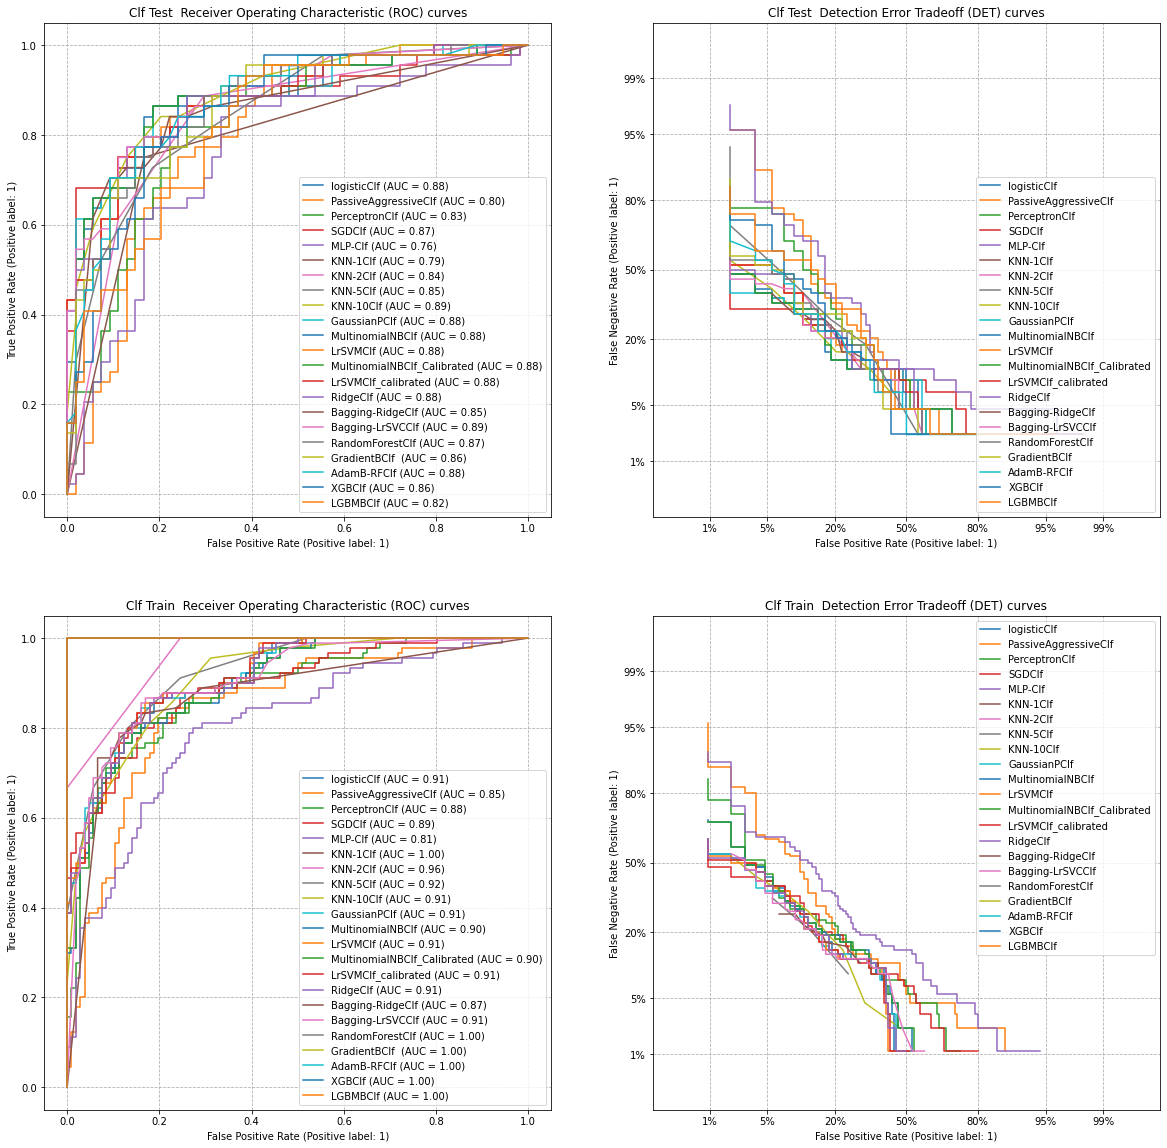

In [50]:
# ML models
import warnings
warnings.simplefilter(action='ignore')
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier
from sklearn.metrics import plot_roc_curve,plot_det_curve,f1_score, roc_auc_score, recall_score,precision_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.calibration import CalibratedClassifierCV,calibration_curve
from sklearn.linear_model import RidgeClassifier,PassiveAggressiveClassifier,Perceptron, SGDClassifier,LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import lightgbm
from lightgbm  import LGBMClassifier

# prepare plots
fig, [[ax_roc, ax_det],[ax_roc1,ax_det1]] = plt.subplots(2, 2, figsize=(20, 20))
acc_scores = {}
auc_scores = {}
acc_scores = pd.DataFrame(columns=['Name', 'Train_Accuracy', 'Test_Accuracy', 'Roc_Auc_score', 'recall_score', 'precision_score','f1_score'])
classifiers = {
    
    'logisticClf' : make_pipeline(LogisticRegression()),
    "PassiveAggressiveClf": make_pipeline(PassiveAggressiveClassifier()),
    "PerceptronClf" : make_pipeline(Perceptron(penalty = 'L2', early_stopping = True)),
    "SGDClf" : make_pipeline(SGDClassifier()),
    "MLP-Clf": make_pipeline(MLPClassifier(early_stopping = True)),
    'KNN-1Clf' :  make_pipeline(KNeighborsClassifier(n_neighbors=1)),
    'KNN-2Clf' :  make_pipeline(KNeighborsClassifier(n_neighbors=2)),
    'KNN-5Clf' :  make_pipeline(KNeighborsClassifier(n_neighbors=5)),
    'KNN-10Clf' :  make_pipeline(KNeighborsClassifier(n_neighbors=10)),
    'GaussianPClf' :  make_pipeline(GaussianProcessClassifier(kernel=1.0 * RBF(1.0))),
    "MultinomialNBClf": make_pipeline(MultinomialNB()),
    "LrSVMClf": make_pipeline(LinearSVC()),
    "MultinomialNBClf_Calibrated": make_pipeline( CalibratedClassifierCV(base_estimator = MultinomialNB(), method='sigmoid', cv=5)),
    "LrSVMClf_calibrated": make_pipeline( CalibratedClassifierCV(base_estimator = LinearSVC(), method='sigmoid', cv=5)),
    "RidgeClf": make_pipeline( CalibratedClassifierCV(base_estimator = RidgeClassifier(), method='sigmoid', cv=5)),  
    "Bagging-RidgeClf": make_pipeline( BaggingClassifier(base_estimator= RidgeClassifier())),
    "Bagging-LrSVCClf" : make_pipeline( BaggingClassifier(base_estimator= LinearSVC(), n_estimators=200)),
    "RandomForestClf": make_pipeline(CalibratedClassifierCV(base_estimator = RandomForestClassifier(n_estimators = 200), method='sigmoid', cv=5)),
    "GradientBClf ": make_pipeline(CalibratedClassifierCV(base_estimator = GradientBoostingClassifier(), method='sigmoid', cv=5)),
    "AdamB-RFClf":make_pipeline(AdaBoostClassifier(base_estimator = RandomForestClassifier(), n_estimators = 200)),
    "XGBClf": make_pipeline(xgb.XGBClassifier(n_estimators = 200)),
    "LGBMBClf": make_pipeline(LGBMClassifier(n_estimators = 200)),

}
 
# Fit the pipeline with the data
for name, clf in classifiers.items():

    clf.fit(X_train, y_train)
    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)
    train_pred_score = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy').mean()
    test_pred_score = cross_val_score(clf, X_test, y_test, cv=5, scoring='accuracy').mean()
  
    print(name + 
          '  Train_Accuracy: ' + str(train_pred_score*100) + '%' + \
          '  Test_Accuracy: ' + str(test_pred_score*100) + '%'+ \
          '  Roc_Auc_score:  ' + str(roc_auc_score(y_test, test_pred)) + "  "  
          )
 
    acc_scores = acc_scores.append({'Name': name, 'Train_Accuracy': train_pred_score, 'Test_Accuracy':test_pred_score, 'Roc_Auc_score':roc_auc_score(y_test, test_pred), 'recall_score':recall_score(y_test, test_pred), 'precision_score':precision_score(y_test, test_pred),'f1_score':f1_score(y_test, test_pred)}, ignore_index=True)

    plot_roc_curve(clf, X_test, y_test, ax=ax_roc, name=name)
    plot_roc_curve(clf, X_train, y_train, ax=ax_roc1, name=name)
    plot_det_curve(clf, X_test, y_test, ax=ax_det, name=name)
    plot_det_curve(clf, X_train, y_train, ax=ax_det1, name=name)


 
 
ax_roc.set_title('Clf Test  Receiver Operating Characteristic (ROC) curves')
ax_det.set_title('Clf Test  Detection Error Tradeoff (DET) curves')

ax_roc.grid(linestyle='--')
ax_det.grid(linestyle='--')

ax_roc1.set_title('Clf Train  Receiver Operating Characteristic (ROC) curves')
ax_det1.set_title('Clf Train  Detection Error Tradeoff (DET) curves')

ax_roc1.grid(linestyle='--')
ax_det1.grid(linestyle='--')
 
plt.legend()
plt.show()

In [51]:
sorted_clf1 = acc_scores.sort_values(by='Test_Accuracy', ascending=False).Name.values.tolist()[:10]
sorted_clf2 = acc_scores.sort_values(by='precision_score', ascending=False).Name.values.tolist()[:10]
sorted_clf3 = acc_scores.sort_values(by='Roc_Auc_score', ascending=False).Name.values.tolist()[:10]
sorted_clf4 = acc_scores.sort_values(by='f1_score', ascending=False).Name.values.tolist()[:10]

result = [sub_list for sub_list in sorted_clf1 if sub_list in sorted_clf2 if sub_list in sorted_clf3 if sub_list in sorted_clf4]

In [319]:
result

['RidgeClf',
 'Bagging-LrSVCClf',
 'LrSVMClf_calibrated',
 'AdamB-RFClf',
 'KNN-10Clf']

In [320]:
acc_scores.sort_values(by='Test_Accuracy', ascending=False).head(10)

,Name,Train_Accuracy,Test_Accuracy,Roc_Auc_score,recall_score,precision_score,f1_score
10,MultinomialNBClf,0.816026,0.805789,0.814394,0.795455,0.795455,0.795455
14,RidgeClf,0.805897,0.797368,0.812290,0.772727,0.809524,0.790698
0,logisticClf,0.805897,0.796316,0.814394,0.795455,0.795455,0.795455
16,Bagging-LrSVCClf,0.816282,0.786842,0.812290,0.772727,0.809524,0.790698
13,LrSVMClf_calibrated,0.811154,0.786842,0.812290,0.772727,0.809524,0.790698
19,AdamB-RFClf,0.770513,0.785789,0.812290,0.772727,0.809524,0.790698
17,RandomForestClf,0.760128,0.785789,0.789562,0.727273,0.800000,0.761905
8,KNN-10Clf,0.785385,0.785789,0.810185,0.750000,0.825000,0.785714
9,GaussianPClf,0.810897,0.785789,0.803030,0.772727,0.790698,0.781609
12,MultinomialNBClf_Calibrated,0.816026,0.785263,0.803030,0.772727,0.790698,0.781609


###**Figuring out Feature importance to Feature Selection** 

In [624]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33 )

In [625]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import RidgeClassifier,PassiveAggressiveClassifier,Perceptron, SGDClassifier,LogisticRegression

clf = LinearSVC().fit(X, y)
#clf = LogisticRegression().fit(X, y)
#clf =  RandomForestClassifier().fit(X, y)
#clf =  SGDClassifier().fit(X, y)
 
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
print(X.values.shape)
print(X_new.shape)

(294, 25)
(294, 12)


In [626]:
X_train_new = model.transform(X_train)
X_test_new = model.transform(X_test)

In [628]:
# feature selection classification testing
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB  
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import RidgeClassifier,PassiveAggressiveClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
 
clf1 = Pipeline([
 
  #('classification', CalibratedClassifierCV(base_estimator = RandomForestClassifier(n_estimators = 500), method='sigmoid', cv=10))
  ('classification',  LinearSVC())
  #('classification', SGDClassifier())
  
])


In [629]:
%%time
clf1.fit(X_train ,y_train)
print('SVC-25 feats : ' + str(clf1.score(X_test,y_test)*100) + '%')  


SVC-25 feats : 78.57142857142857%
CPU times: user 7 ms, sys: 1.01 ms, total: 8.01 ms
Wall time: 7.21 ms


In [630]:
%%time
clf1.fit(X_train_new ,y_train)
print('SVC-12 feats : ' + str(clf1.score(X_test_new,y_test)*100) + '%') 

SVC-12 feats : 79.59183673469387%
CPU times: user 2.2 ms, sys: 1.98 ms, total: 4.18 ms
Wall time: 3.31 ms


#### **Reminder: The Feature Selection improves the accuracy of LinearSVC by nearly 1 percent and speeds up the processing time by nearly 3 times. Except from RF, all of other tested model has been proved to be more sufficient than the older dataset, the reason why it doesn't works for MNBclf because all the feature coefficient values or feature importance are all negative.**

In [ ]:
!pip install -U yellowbrick

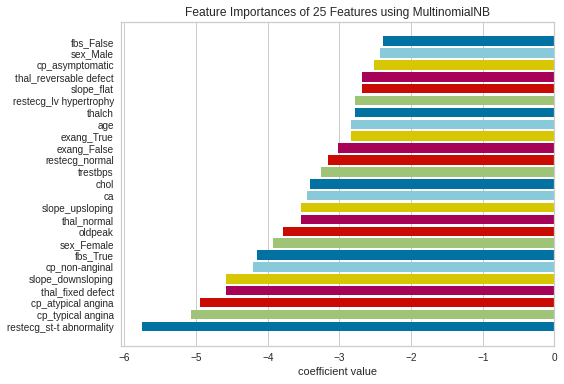

In [63]:
from yellowbrick.model_selection import FeatureImportances
from sklearn.naive_bayes import MultinomialNB  
 
model =  MultinomialNB()

viz =  FeatureImportances(model, stack=False, relative=False )

viz.fit(X, y)

viz.show()

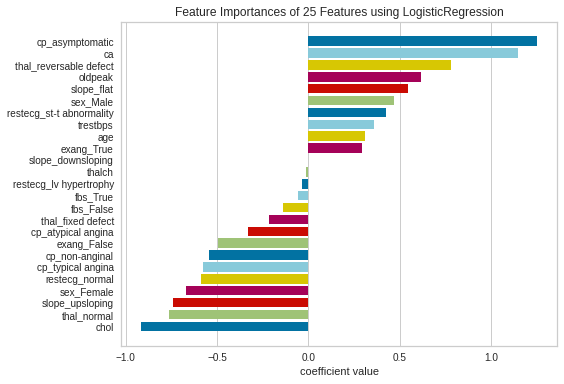

In [64]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="liblinear",  C = 1.6)

viz = FeatureImportances(model, stack=False, relative=False)

viz.fit(X, y)

viz.show()

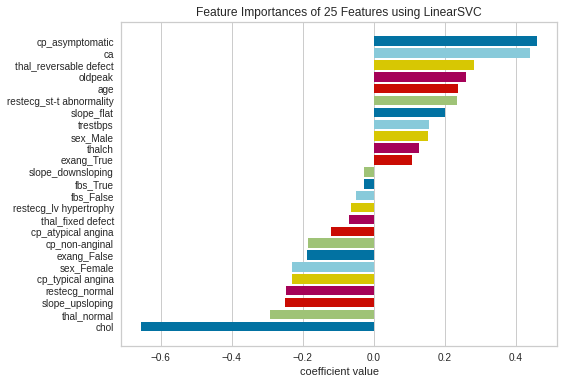

In [65]:
from sklearn.svm import LinearSVC
model = LinearSVC()

viz = FeatureImportances(model, stack=False, relative=False)

viz.fit(X, y)

viz.show()

### **Fine Tuning Top ML models**

In [483]:
from sklearn.model_selection import train_test_split
df_NEW_Encoded = df_NEW_Encoded.dropna()
X = df_NEW_Encoded.drop('target', axis=1).copy()
y = df_NEW_Encoded.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

In [471]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# WEB link reference : https://www.kaggle.com/faressayah/predicting-heart-disease-using-machine-learning
# Author: Fares Sayah
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [484]:
import warnings
warnings.simplefilter(action='ignore')
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.linear_model import LogisticRegression
params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear","newton-cg", "lbfgs"],
           'dual':[True,False]}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-4, verbose=1, cv=5 )
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(X_train, y_train)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best parameters: {'C': 0.03359818286283781, 'dual': True, 'solver': 'liblinear'}
Train Result:
Accuracy Score: 82.65%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.833333   0.818182  0.826531    0.825758      0.826376
recall       0.849057   0.800000  0.826531    0.824528      0.826531
f1-score     0.841121   0.808989  0.826531    0.825055      0.826367
support    106.000000  90.000000  0.826531  196.000000    196.000000
_______________________________________________
Confusion Matrix: 
 [[90 16]
 [18 72]]

Test Result:
Accuracy Score: 78.57%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.789474   0.780488  0.785714   0.784981      0.785439
recall      0.833333   0.727273  0.785714   0.780303      0.785714
f1-scor

In [485]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
params = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,20,21,24,36]}
 
knn_clf = KNeighborsClassifier()

knn_cv = GridSearchCV(knn_clf, params, scoring="accuracy", n_jobs=-4, verbose=1, cv=5 )
knn_cv.fit(X_train, y_train)
best_params = knn_cv.best_params_
print(f"Best parameters: {best_params}")
knnclf =  KNeighborsClassifier(**best_params)

knnclf.fit(X_train, y_train)
print_score(knnclf, X_train, y_train, X_test, y_test, train=True)
print_score(knnclf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
Best parameters: {'n_neighbors': 13}
Train Result:
Accuracy Score: 81.12%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.810811   0.811765  0.811224    0.811288      0.811249
recall       0.849057   0.766667  0.811224    0.807862      0.811224
f1-score     0.829493   0.788571  0.811224    0.809032      0.810703
support    106.000000  90.000000  0.811224  196.000000    196.000000
_______________________________________________
Confusion Matrix: 
 [[90 16]
 [21 69]]

Test Result:
Accuracy Score: 80.61%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.830189   0.777778  0.806122   0.803983      0.806657
recall      0.814815   0.795455  0.806122   0.805135      0.806122
f1-score    0.822430   0.786517  0.806122   0.804473

In [486]:
from sklearn.naive_bayes import MultinomialNB
params = {"alpha": np.logspace(0, 1, 20)}

MNB_clf = MultinomialNB()

MNB_cv = GridSearchCV(MNB_clf, params, scoring="accuracy", n_jobs=-4, verbose=1, cv=5)
MNB_cv.fit(X_train, y_train)
best_params = MNB_cv.best_params_
print(f"Best parameters: {best_params}")
MNB_clf = MultinomialNB(**best_params)

MNB_clf.fit(X_train, y_train)
print_score(MNB_clf, X_train, y_train, X_test, y_test, train=True)
print_score(MNB_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'alpha': 2.636650898730358}
Train Result:
Accuracy Score: 82.14%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.831776   0.808989  0.821429    0.820382      0.821312
recall       0.839623   0.800000  0.821429    0.819811      0.821429
f1-score     0.835681   0.804469  0.821429    0.820075      0.821349
support    106.000000  90.000000  0.821429  196.000000    196.000000
_______________________________________________
Confusion Matrix: 
 [[89 17]
 [18 72]]

Test Result:
Accuracy Score: 81.63%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.833333   0.795455  0.816327   0.814394      0.816327
recall      0.833333   0.795455  0.816327   0.814394      0.816327
f1-score    0.833333   0.795455  0.816327  

In [487]:
#GridSearch CV on LinearSVC  
from sklearn.svm import LinearSVC
params = {"C": np.logspace(-2, 2, 10),
          "multi_class": ['ovr', 'crammer_singer'],
          'loss' :['hinge', 'squared_hinge'],
          'penalty':['l1','l2'],
          'dual':[True,False]
          }
lSVM_clf = LinearSVC()

lSVM_cv = GridSearchCV(lSVM_clf, params, scoring="accuracy", n_jobs=4, verbose=1, cv=5 )
lSVM_cv.fit(X_train, y_train)
best_params  = lSVM_cv.best_params_
print(f"Best parameters: {best_params}")
lSVM_clf = LinearSVC(**best_params)

lSVM_clf.fit(X_train, y_train)

print_score(lSVM_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lSVM_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best parameters: {'C': 0.01, 'dual': True, 'loss': 'hinge', 'multi_class': 'crammer_singer', 'penalty': 'l1'}
Train Result:
Accuracy Score: 83.16%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.828829   0.835294  0.831633    0.832061      0.831798
recall       0.867925   0.788889  0.831633    0.828407      0.831633
f1-score     0.847926   0.811429  0.831633    0.829677      0.831167
support    106.000000  90.000000  0.831633  196.000000    196.000000
_______________________________________________
Confusion Matrix: 
 [[92 14]
 [19 71]]

Test Result:
Accuracy Score: 81.63%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.821429   0.809524  0.816327   0.815476      0.816084
recall      0.851852   0.772727  0.816327   0

In [488]:
# Voting Model Prediction for top3 ML models
from sklearn.ensemble import VotingClassifier
lSVMclf= LinearSVC(**lSVM_cv.best_params_)
mnbclf = MultinomialNB(**MNB_cv.best_params_)
knnc = KNeighborsClassifier(**knn_cv.best_params_)
clf=VotingClassifier(estimators=[('knn',knnc),('lSVM',lSVMclf),('mnb',mnbclf)],voting='hard')
clf.fit(X_train,y_train)
y_train_pred=clf.predict(X_train)
y_test_pred =clf.predict(X_test)

print('Accuracy score-Train',accuracy_score(y_train,y_train_pred))
print('Accuracy score-Test',accuracy_score(y_test,y_test_pred))

Accuracy score-Train 0.826530612244898
Accuracy score-Test 0.8061224489795918


In [489]:
# general test on calibrated Bagging_MNB -- find out no progress from n_estimators = 200 
Bagging_MNB_calibrated =  make_pipeline(CalibratedClassifierCV(base_estimator = BaggingClassifier(base_estimator= MultinomialNB(), n_estimators=200), method='sigmoid', cv=5))
Bagging_MNB_calibrated.fit(X_train,y_train)
y_train_pred=Bagging_MNB_calibrated.predict(X_train)
y_test_pred =Bagging_MNB_calibrated.predict(X_test)

print('Accuracy score-Train',accuracy_score(y_train,y_train_pred))
print('Accuracy score-Test',accuracy_score(y_test,y_test_pred))

Accuracy score-Train 0.8214285714285714
Accuracy score-Test 0.8061224489795918


In [493]:
#GridSearch CV on Bagging MNB 
params = {'baggingclassifier__n_estimators' : (0,1000,100), 'baggingclassifier__base_estimator__alpha' : np.logspace(0, 2, 20)}
Bagging_MNB =  make_pipeline(BaggingClassifier(base_estimator= MultinomialNB()))

Bagging_MNB_cv = GridSearchCV(Bagging_MNB, params, scoring="accuracy", n_jobs=4, verbose=1, cv=5 )

Bagging_MNB_cv.fit(X_train, y_train)

best_params  = Bagging_MNB_cv.best_params_

print(f"Best parameters: {best_params}")


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters: {'baggingclassifier__base_estimator__alpha': 2.0691380811147897, 'baggingclassifier__n_estimators': 1000}


In [496]:
Bagging_MNB_tuned =  make_pipeline(BaggingClassifier(base_estimator= MultinomialNB(alpha = 2), n_estimators=1000))
Bagging_MNB_tuned.fit(X_train,y_train)
y_train_pred=Bagging_MNB_tuned.predict(X_train)
y_test_pred =Bagging_MNB_tuned.predict(X_test)

print('Accuracy score-Train',accuracy_score(y_train,y_train_pred))
print('Accuracy score-Test',accuracy_score(y_test,y_test_pred))

Accuracy score-Train 0.8214285714285714
Accuracy score-Test 0.8163265306122449


In [ ]:
'''
1.  -- MultinomialNB ~0.8314

2.  -- LinearSVC ~0.8163

3.  -- KNeighborsClassifier(n_neighbors=10) ~0.8063

4.  -- RandomForestClassifier(n_estimators = 1000) ~ 0.809

5.  --   ~0.796
'''

Above ML Models BEST Test accuracy got about 83 %

### **ANN Classification**

In [435]:
import numpy as np
from numpy import mean, std
#Selected features vision 
mean = X_new.mean(axis=0)
X_new -= mean
std = X_new.std(axis=0)
X_new /= std
X_val = X_new 
print (X_val.shape)

(294, 12)


In [460]:
#Unselected features vision 
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std
X_val = X 
print (X_val.shape)

(294, 25)


In [416]:
# convert the data to categorical labels
from keras.utils.np_utils import to_categorical
Y = to_categorical(y, num_classes=None)
print (Y.shape)
print (Y[:10])

(294, 2)
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [461]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X_val, Y, test_size=0.33, random_state=100)

In [462]:
print(X_val.shape[1])

25


In [465]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers
 
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=25, kernel_initializer='normal', kernel_regularizer=regularizers.l2(1e-3), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(32, kernel_initializer='normal', kernel_regularizer=regularizers.l2(1e-3), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    #adam = Adam(lr=1e-3)
    #'rmsprop'
    model.compile(loss='categorical_crossentropy', optimizer= 'rmsprop' , metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())



Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 32)                832       
_________________________________________________________________
dropout_42 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_64 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_43 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_65 (Dense)             (None, 2)                 66        
Total params: 1,954
Trainable params: 1,954
Non-trainable params: 0
_________________________________________________________________
None


In [466]:
# fit the model to the training data
history=model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=50, batch_size=10)

Epoch 1/50
20/20 [==============================] - 1s 14ms/step - loss: 0.6882 - accuracy: 0.6006 - val_loss: 0.6556 - val_accuracy: 0.7551
Epoch 2/50
20/20 [==============================] - 0s 5ms/step - loss: 0.6376 - accuracy: 0.7809 - val_loss: 0.5837 - val_accuracy: 0.8163
Epoch 3/50
20/20 [==============================] - 0s 5ms/step - loss: 0.5734 - accuracy: 0.8204 - val_loss: 0.5107 - val_accuracy: 0.8061
Epoch 4/50
20/20 [==============================] - 0s 5ms/step - loss: 0.4706 - accuracy: 0.8457 - val_loss: 0.4655 - val_accuracy: 0.8163
Epoch 5/50
20/20 [==============================] - 0s 5ms/step - loss: 0.4241 - accuracy: 0.8468 - val_loss: 0.4353 - val_accuracy: 0.8571
Epoch 6/50
20/20 [==============================] - 0s 5ms/step - loss: 0.4413 - accuracy: 0.8120 - val_loss: 0.4213 - val_accuracy: 0.8571
Epoch 7/50
20/20 [==============================] - 0s 5ms/step - loss: 0.3933 - accuracy: 0.8247 - val_loss: 0.4137 - val_accuracy: 0.8571
Epoch 8/50
20/20 [=

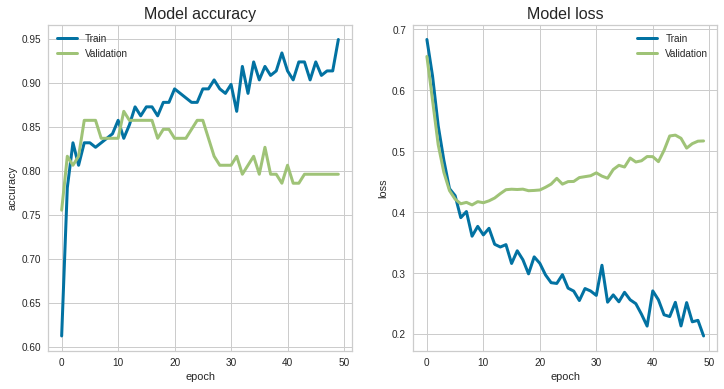

In [467]:
fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# summarize history for accuracy
axis1.plot(history.history['accuracy'], label='Train', linewidth=3)
axis1.plot(history.history['val_accuracy'], label='Validation', linewidth=3)
axis1.set_title('Model accuracy', fontsize=16)
axis1.set_ylabel('accuracy')
axis1.set_xlabel('epoch')
axis1.legend(loc='upper left')

# summarize history for loss
axis2.plot(history.history['loss'], label='Train', linewidth=3)
axis2.plot(history.history['val_loss'], label='Validation', linewidth=3)
axis2.set_title('Model loss', fontsize=16)
axis2.set_ylabel('loss')
axis2.set_xlabel('epoch')
axis2.legend(loc='upper right')
plt.show()


##### **Note: when the ratio between train and test dataset equals to 2/3, the train takes 2/3, and the test takes 1/3, and the Average testing Accuracy score is around 79%, it gives us the best performance about 80% Test Accuracy**


In [468]:
# tried to fine-tuning the activation Function, optimizer(adam, rmsprop), dense unit, dropout rate
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.5168 - accuracy: 0.7959


[0.5168362259864807, 0.795918345451355]